In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
consumption=pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CreditConsumptionData.xlsx")
behaviour =pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerBehaviorData.xlsx")
demographic=pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerDemographics.xlsx")

In [110]:
df=pd.merge(left=behaviour,right=consumption,left_on=consumption['ID'],right_on=behaviour['ID'],how='inner')

In [111]:
df=df.drop('key_0',axis=1)

In [112]:
df=pd.merge(left=df,right=demographic,left_on=df['ID_y'],right_on=demographic['ID'],how='inner')

In [113]:
df.head()

,key_0,ID_x,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,14081,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,...,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,5124,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,...,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0
2,1119,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,...,1119,current,M,35,MEDIUM,4.5,9,958.0,0,9.0
3,2390,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,...,2390,current,M,58,MEDIUM,34.2,10,945.0,1,12.0
4,4322,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,...,4322,current,M,32,MEDIUM,10.8,10,249.0,1,6.0


In [114]:
df=df.drop(['key_0','ID_x','ID_y'],axis=1)

In [115]:
df.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,...,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,...,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0


In [116]:
#checking for missing values
df.isnull().sum().sum()

5017

In [124]:
null_cc_cons = pd.isnull(df['cc_cons'])
new_df = df[null_cc_cons]
new_df
#dataframe containing new customers for which Average Credit Card Spend in next three months is to be predicted

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,17591,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,13541,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,13431,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,8687,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,14727,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,12512,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,14224,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,18740,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,18134,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [125]:
#since there are missiing values , removing them 
df.dropna(inplace=True)

##  Exploratory Data analysis

In [11]:
df['account_type'].value_counts(normalize=True)

current    0.848406
saving     0.151594
Name: account_type, dtype: float64

#### the distribution of account types (current or saving)
84.8 % of the customers are having current account rest 15.1% have saving account

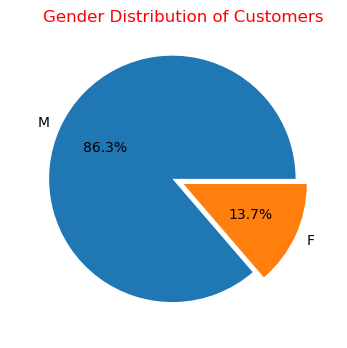

In [13]:
plt.figure(figsize=(4,4))
df['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Gender Distribution of Customers',c='r')
plt.ylabel(" ")
plt.show()

#### gender distributed among customers--
86.3% of customer are MALE whereas only 13.6% are women.

In [14]:
bins = [20, 30, 40, 50, 60, 70]

In [15]:
df['Age_Bin'] = pd.cut(df['age'], bins=bins)

In [16]:
bin_counts = df['Age_Bin'].value_counts()

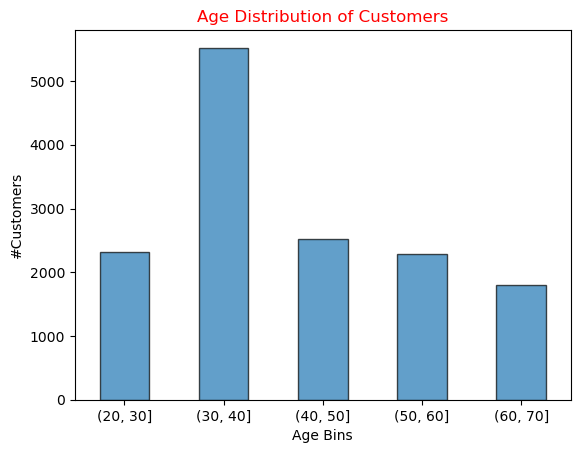

In [17]:
bin_counts = df['Age_Bin'].value_counts().sort_index()
bin_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('#Customers')
plt.xticks(rotation=0)
plt.title('Age Distribution of Customers',c='r')
plt.show()

##### customer of age group 30-40 are highest.

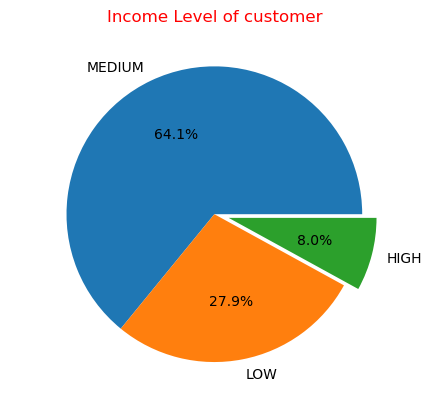

In [18]:
df['Income'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=(0, 0 ,0.1))
plt.title("Income Level of customer",c='r')
plt.ylabel(" ")
plt.show()

#### the income levels of the customers
8% of customers have high income where as 27.9% have low rest 64.1% have medium.

In [19]:
bins_tenure = [2,4, 6, 8,10]
df['Tenure_with_Bank_bins'] = pd.cut(df['Tenure_with_Bank'], bins=bins_tenure)

In [20]:
bin_counts = df['Tenure_with_Bank_bins'].value_counts().sort_index()

In [21]:
pd.DataFrame(bin_counts)

,Tenure_with_Bank_bins
"(2, 4]",3002
"(4, 6]",2991
"(6, 8]",3045
"(8, 10]",2976


##### distribution of years customers been  with the bank

In [22]:
round(df['Tenure_with_Bank'].mean(),2)

5.51

##### 5.51 is the avg years customers have been with the bank .

In [27]:
q=df.groupby(by=['region_code']).agg(customer=('region_code','count')).sort_values(by=['customer'],ascending=False).head(10)

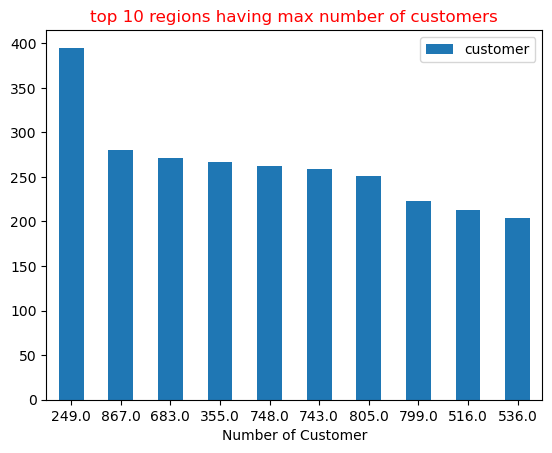

In [33]:
q.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('top 10 regions having max number of customers',c='r')
plt.show()

##### the region code distributed among customers

In [35]:
df['NetBanking_Flag'].value_counts(normalize=True)

1    0.719688
0    0.280312
Name: NetBanking_Flag, dtype: float64

##### 71.9% percentage of customers use net banking for transactions.

In [40]:
df['Avg_days_between_transaction'].mean()

11.04968654128318

##### the average number of days between transactions for customers is 11

In [47]:
df[['age','NetBanking_Flag']].corr()

,age,NetBanking_Flag
age,1.000000,0.018445
NetBanking_Flag,0.018445,1.000000


##### correlations between variables like age, and net banking usage is very low showing that age is not a factor affecting use of NetBanking

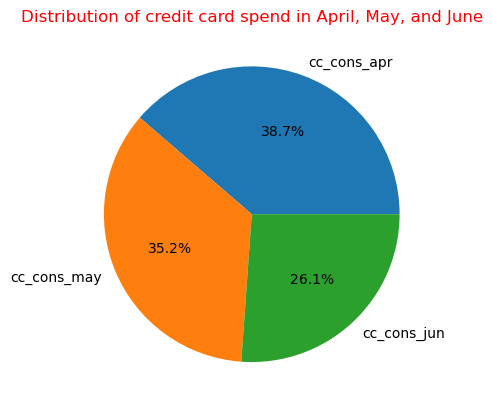

In [60]:
df[['cc_cons_apr','cc_cons_may','cc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of credit card spend in April, May, and June',c='r')
plt.show()

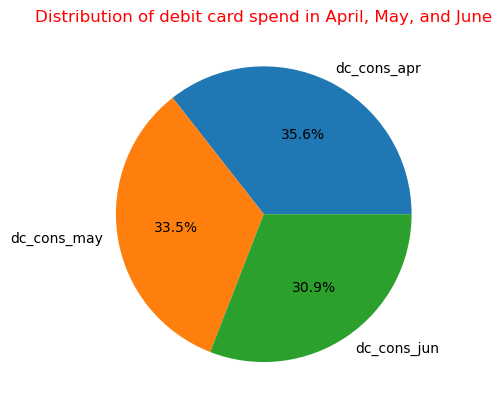

In [61]:
df[['dc_cons_apr','dc_cons_may','dc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of debit card spend in April, May, and June',c='r')
plt.show()

In [ ]:
distribution of the number of credit card transactions in each month

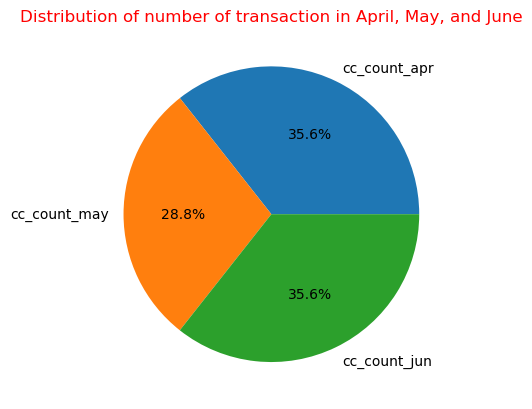

In [63]:
df[['cc_count_apr','cc_count_may','cc_count_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of number of transaction in April, May, and June',c='r')
plt.show()

In [85]:
auto=[250000,250000*2,250000*3,250000*4]

In [89]:
df['card_lim_bin']=pd.cut(df['card_lim'],bins=auto,right=True)

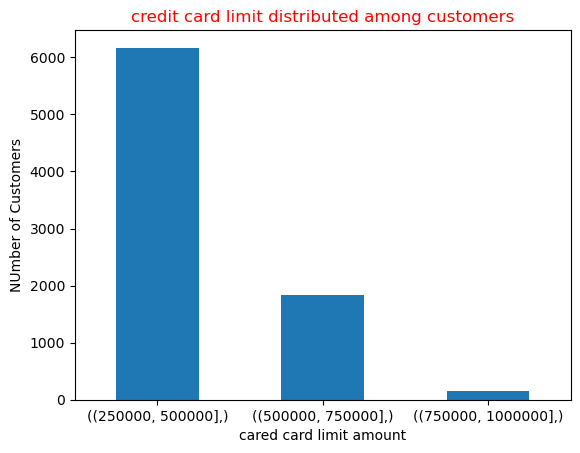

In [98]:
df[['card_lim_bin']].value_counts().plot(kind='bar',)
plt.title("credit card limit distributed among customers",c='r')
plt.ylabel("NUmber of Customers")
plt.xlabel("cared card limit amount")
plt.xticks(rotation=0)
plt.show()

##### Max number of customer have there limit between 25,000 to 50,000

In [105]:
df['personal_loan_active'].value_counts()

1    14994
Name: personal_loan_active, dtype: int64

In [106]:
df['vehicle_loan_active'].value_counts()

1    14994
Name: vehicle_loan_active, dtype: int64

In [108]:
df['vehicle_loan_closed'].value_counts()

1    14994
Name: vehicle_loan_closed, dtype: int64

In [126]:
df['personal_loan_closed'].value_counts()

1.0    14994
Name: personal_loan_closed, dtype: int64

###### by the above elavuation ,it looks like every customer have an active personal loan and active vihicle loan but also closed personal loan and closed vehicle loan in last 12 months with other bank.


In [ ]:
df['de']

Text(0.5, 1.0, 'Distribution of Credit Amounts in June')

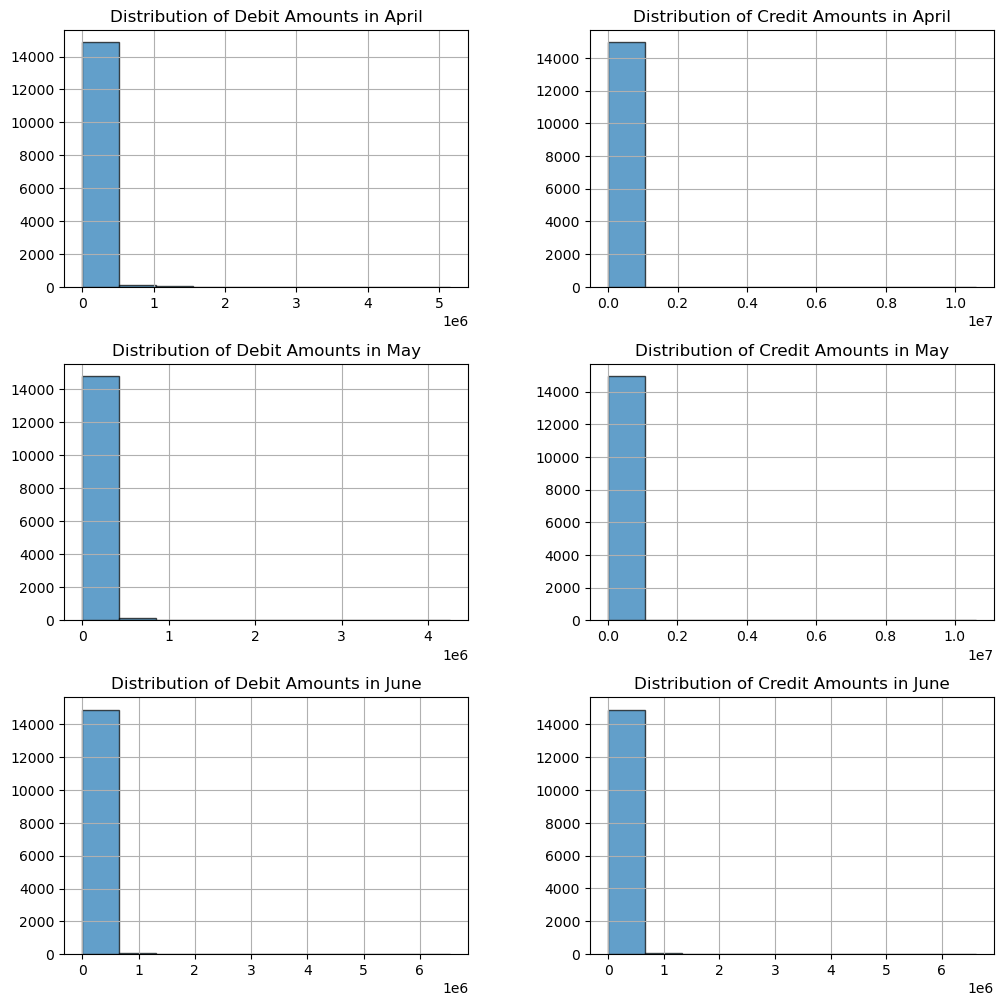

In [139]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
df[['debit_amount_apr', 'credit_amount_apr']].hist(ax=axes[0], bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Debit Amounts in April')
axes[0, 1].set_title('Distribution of Credit Amounts in April')

df[['debit_amount_may', 'credit_amount_may']].hist(ax=axes[1], bins=10, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Debit Amounts in May')
axes[1, 1].set_title('Distribution of Credit Amounts in May')

# Plot histograms for Debit and Credit amounts in June
df[['debit_amount_jun', 'credit_amount_jun']].hist(ax=axes[2], bins=10, edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Distribution of Debit Amounts in June')
axes[2, 1].set_title('Distribution of Credit Amounts in June')

##### distribution of debit and credit amounts in April, May, and June

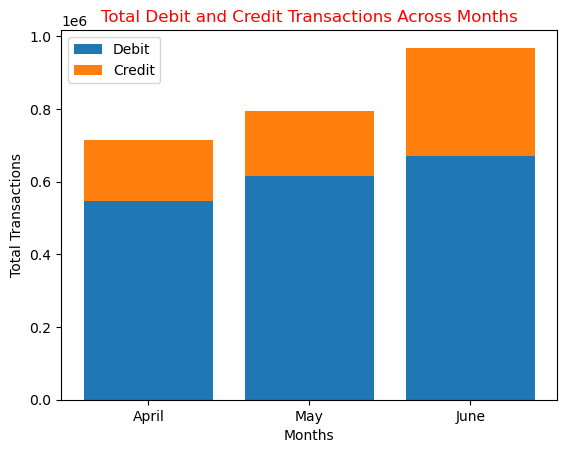

In [147]:
# Calculate the total number of debit and credit transactions for each month
df['Total_Debit_Apr_May_Jun'] = df['debit_count_apr'] + df['debit_count_may'] + df['debit_count_jun']
df['Total_Credit_Apr_May_Jun'] = df['credit_count_apr'] + df['credit_count_may'] + df['credit_count_jun']

months = ['April', 'May', 'June']
debit_counts = df[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].sum()
credit_counts = df[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].sum()
plt.bar(months, debit_counts,  label='Debit')
plt.bar(months, credit_counts,label='Credit', bottom=debit_counts)
plt.xlabel('Months')
plt.ylabel('Total Transactions')
plt.title('Total Debit and Credit Transactions Across Months',c='r')
plt.legend()
plt.show()